In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vae import VAE
from functools import reduce
import operator

Using TensorFlow backend.


### Load LunarLander Training Data
Go ahead and load the data from disk.

In [2]:
lunar_data_path = 'LunarLander-v2_img_10_200.npz'
lunar_data = np.load(lunar_data_path)

And the model itself, of course.

In [3]:
lunar_vae_32 = VAE()
lunar_vae_32.make_vae(lunar_data_path, 32)
lunar_vae_32.load_model('LunarLander_32.h5')

lunar_vae_64 = VAE()
lunar_vae_64.make_vae(lunar_data_path, 64)
lunar_vae_64.load_model('LunarLander_64.h5')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 80, 80, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 40, 40, 32)   1568        encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 20, 20, 64)   32832       conv2d_1[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 25600)        0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
dense_1 (D

### LunarLander Visualization
Here's what a typical frame from this environment will look like.

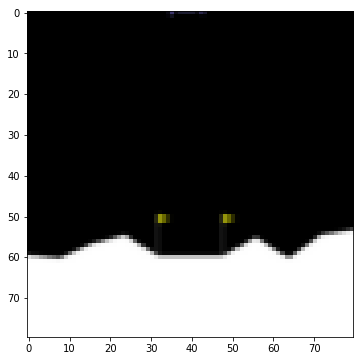

In [5]:
img0 = lunar_data['arr_0'][5]
fig = plt.figure(figsize = (6,6))
fig.add_subplot(111).imshow(img0)

The VAE managed to capture all of the above in just one latent vector.

In [6]:
z0 = lunar_vae_32.encode_image(np.array([img0]))
z0

array([[-1.3001398 ,  1.0689161 , -1.6290952 , -0.46890956, -0.16623922,
         0.83315796,  1.4367483 ,  2.1989477 ,  0.13837706,  0.34756315,
        -2.719215  ,  1.705712  ,  1.160964  , -1.0021001 , -2.8722415 ,
        -0.5000749 , -2.0244489 ,  0.74868554,  0.54179305,  2.4788024 ,
        -0.6230557 ,  4.3077726 , -1.5625458 ,  0.05849813, -1.8690888 ,
        -2.4109027 ,  4.276283  ,  0.68334275, -2.110296  ,  1.8426754 ,
         1.0411577 , -3.500056  ]], dtype=float32)

Side-by-side comparison of original data & VAE reconstruction, for your viewing pleasure.

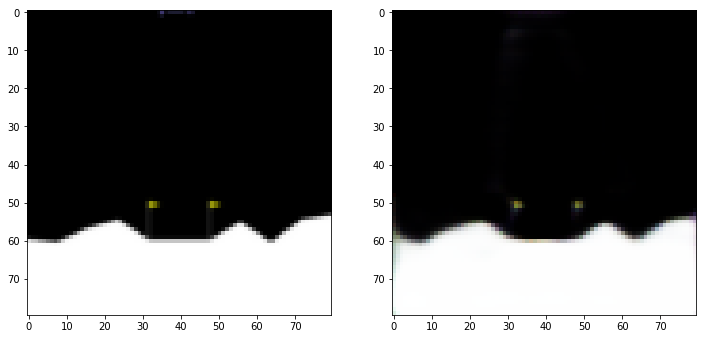

In [7]:
rec0 = lunar_vae_32.decode_latent(z0)[0]
f, axarr = plt.subplots(1,2,figsize=(12,12))
axarr[0].imshow(img0)
axarr[1].imshow(rec0)
plt.show()

Curious about just how compressed the information is?

In [162]:
compression = reduce(operator.mul, (rec0.shape[i] for i in range(len(rec0.shape)))) / z0.shape[1]
print(str(compression) + "x compression ratio!")

600.0x compression ratio!


Not exactly the same (some noise), but VAE reconstruction gets the gist of it!

### VAE Resiliency
Now, what happens if we add some encoding noise?

Let's nudge our latent vector a bit.

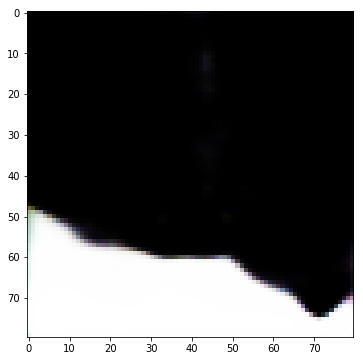

In [8]:
z0 += 5 * 1.2
rec0 = lunar_vae_32.decode_latent(z0)[0]
fig = plt.figure(figsize = (6,6))
fig.add_subplot(111).imshow(rec0)

Now let's introduce a spaceship.

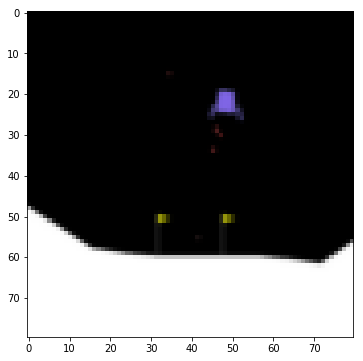

In [9]:
img1 = lunar_data['arr_8'][30]
fig = plt.figure(figsize = (6,6))
fig.add_subplot(111).imshow(img1)

What does our new latent vector look like?

In [10]:
z1 = lunar_vae_32.encode_image(np.array([img1]))
z1

array([[-0.6040897 ,  0.35435015,  1.1287361 , -1.5368831 , -1.9047446 ,
         2.919083  ,  2.1033916 ,  2.4846044 ,  1.8907075 ,  2.4987402 ,
        -3.7411    ,  0.6756671 ,  0.8044321 , -0.5941451 , -1.6131973 ,
         0.66630757, -3.046176  ,  2.393094  ,  0.2831686 ,  1.4922162 ,
         0.3926213 ,  3.1581893 ,  0.25930443, -1.1101185 , -0.73796797,
        -3.696345  ,  2.7782009 ,  1.5121093 , -1.2970392 ,  2.48637   ,
         2.3320506 , -2.4897249 ]], dtype=float32)

Alright, let's try it out!

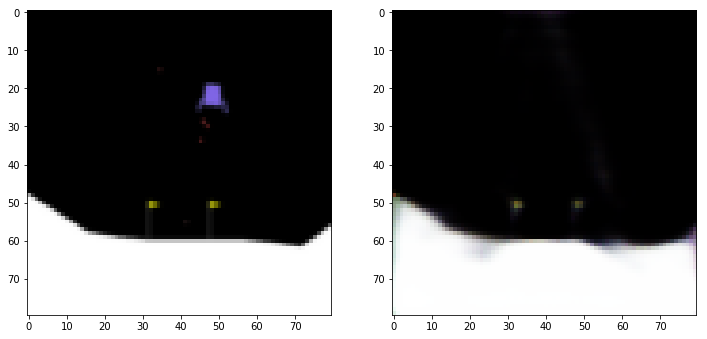

In [11]:
rec1 = lunar_vae_32.decode_latent(z1)[0]
f, axarr = plt.subplots(1,2,figsize=(12,12))
axarr[0].imshow(img1)
axarr[1].imshow(rec1)
plt.show()

Terrain looks good (maybe a bit fuzzy?), but where's the spaceship?!

A lot of reconstruction loss is going associated with the black/white since they are the extremes. The purple is not a huge deal, being pretty close to black anyway. It is in the net's interest to get the terrain right first, so it will dedicate most of 32-dim latent vector to that.

Let's try a bigger latent vector.

In [12]:
z1 = lunar_vae_64.encode_image(np.array([img1]))
z1

array([[-1.4345390e+00, -4.4391900e-01,  2.5021732e-03,  2.8173929e-01,
         2.1701066e+00, -9.0087402e-01, -1.2688181e+00, -1.6486469e-01,
        -4.7119355e-01,  5.8687508e-01,  1.5792559e+00, -7.6971471e-01,
        -6.1625838e-01,  4.6111518e-01, -1.3277707e+00,  1.1067094e-01,
         5.5009878e-01, -1.1491731e+00,  8.1090182e-01, -2.2445205e-01,
        -7.2846591e-01, -2.0788331e-01, -1.0732017e+00,  3.2700497e-01,
         3.8515043e-01,  6.0426354e-01,  1.7519847e-01,  8.7827700e-01,
         2.3169154e-01, -1.8819438e+00,  1.9357011e+00, -2.8965759e-01,
        -1.0102355e+00, -2.7520159e-01, -2.6247066e-01,  4.7037107e-01,
         2.7639693e-01, -1.5839879e-01,  5.1315802e-01,  2.3056626e-01,
         3.4786448e-01,  1.8536410e-01, -1.7674536e+00,  1.0247508e+00,
         7.3701608e-01,  3.0926314e-01,  2.4472706e-01,  1.5367870e-01,
         8.7811697e-01, -8.1419259e-02, -4.8278496e-01,  2.6552725e+00,
        -4.7357678e-01,  4.6758908e-01, -1.3346248e+00,  2.65495

Any improvement?

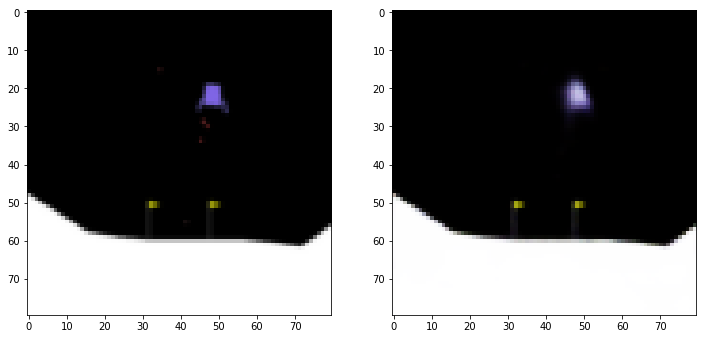

In [13]:
rec1 = lunar_vae_64.decode_latent(z1)[0]
f, axarr = plt.subplots(1,2,figsize=(12,12))
axarr[0].imshow(img1)
axarr[1].imshow(rec1)
plt.show()

Terrain looks crisper, and there's definitely a discernible spaceship now (exact ship details don't really matter). Looks good!

However: does it generalize to other environments?

## Space Invaders VAE

Let's try out the model with Space Invaders-v0. We're gonna go ahead and load the data & model from disk.

In [14]:
space_data_path = 'SpaceInvaders-v0_img_10_250.npz'
space_data = np.load(space_data_path)

In [15]:
space_vae = VAE()
space_vae.make_vae(space_data_path, 64)
space_vae.load_model('SpaceInvaders_64.h5')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 120, 120, 3)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 60, 60, 32)   1568        encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 30, 30, 64)   32832       conv2d_5[0][0]                   
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 57600)        0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
dense_5 (D

What does a typical data frame look like?

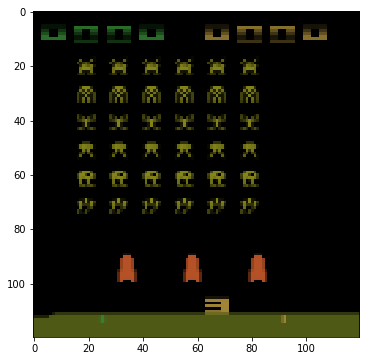

In [179]:
img2 = space_data['arr_0'][0]
fig = plt.figure(figsize = (6,6))
fig.add_subplot(111).imshow(img2)

What does the latent encoding of the above frame look like?

In [180]:
z2 = space_vae.encode_image(np.array([img2]))
z2

array([[ 0.04478379, -0.34792203,  0.07682362, -0.16269074, -0.8173631 ,
        -0.03523439, -0.28570852,  0.3715499 , -0.47265226,  1.3858545 ,
        -0.33234373,  0.15838446,  0.05096029,  1.3154534 , -0.82191676,
         0.93996066, -0.02722929,  0.34098753, -0.19450042,  1.3147075 ,
         0.1585477 ,  0.00853404,  0.11563194,  0.8735721 ,  0.0651836 ,
        -0.70236593,  0.8387078 ,  0.0023457 , -0.613205  ,  0.03743906,
         0.12751749, -0.64411086,  0.18175596,  0.08599611, -0.02176218,
        -0.08763275, -0.07927035,  0.22035575,  0.03117396,  0.64139795,
         0.13995706,  0.04110004,  1.6174166 ,  0.293074  , -0.03699651,
        -0.82541054,  0.01470217, -0.69374734,  0.2075898 ,  0.09245189,
        -0.15382466,  0.0043299 , -0.4458093 ,  1.129178  ,  0.24027243,
         0.090361  ,  0.04808352, -1.13171   ,  0.19567464, -1.304941  ,
         0.2729053 ,  0.1336677 , -0.5323321 ,  1.4610131 ]],
      dtype=float32)

Let's do a side-by-side comparison with the original & reconstruction!

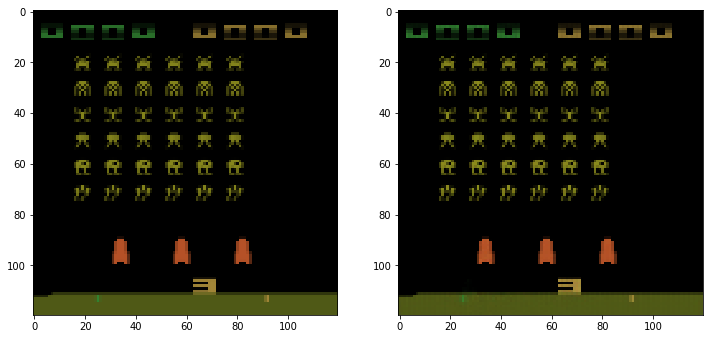

In [181]:
rec2 = space_vae.decode_latent(z2)[0]
f, axarr = plt.subplots(1,2,figsize=(12, 12))
axarr[0].imshow(img2)
axarr[1].imshow(rec2)
plt.show()

It's pretty damn good. Some slight fuzziness if you squint, but very, very good reconstruction accuracy overall!

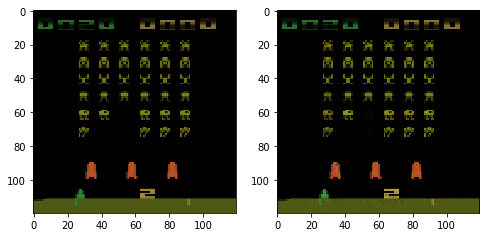

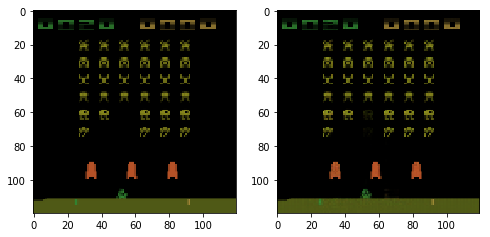

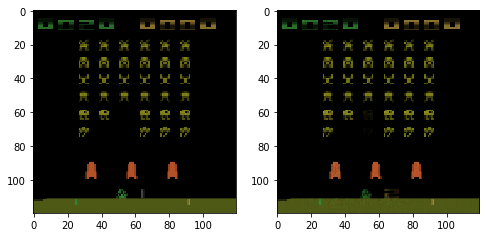

In [191]:
for on in [-1, -28, -46]:
  img2 = space_data['arr_5'][on] #also do 8
  z2 = space_vae.encode_image(np.array([img2]))
  rec2 = space_vae.decode_latent(z2)[0]
  f, axarr = plt.subplots(1,2,figsize=(8,8))
  axarr[0].imshow(img2)
  axarr[1].imshow(rec2)
  plt.show()

Pretty much all elements there (and in the right color too)!

Exactly how small can we make these latent vectors?

## CartPole VAE

Obviously our overall method is way too overpowered for CartPole, but it's a good way to see just how well our VAE can learn features. 

Let's go ahead and load the model & data from disk.

In [192]:
cart_data_path = 'CartPole-v0_img_10_50.npz'
cart_data = np.load(cart_data_path)

In [193]:
cart_vae = VAE()
cart_vae.make_vae(cart_data_path, 8)
cart_vae.load_model('CartPole_8.h5')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 120, 120, 3)  0                                            
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 60, 60, 32)   1568        encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 30, 30, 64)   32832       conv2d_51[0][0]                  
__________________________________________________________________________________________________
flatten_26 (Flatten)            (None, 57600)        0           conv2d_52[0][0]                  
__________________________________________________________________________________________________
dense_51 (

What does a typical frame look like?

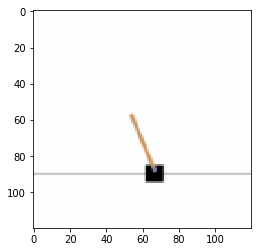

In [222]:
img3 = cart_data['arr_0'][-28] #(0, 0), (0, -5), (1, 15)
plt.imshow(img3)

What about a typical latent encoding?

In [223]:
z3 = cart_vae.encode_image(np.array([img3]))
z3

array([[-1.5596359 , -1.006218  , -2.3559363 , -1.4508643 , -0.69098943,
        -2.915323  ,  0.91160685, -1.6317985 ]], dtype=float32)

Only 8 dimensions, that's right. Theoretically, we could get down to as little as 2, but it would require copious training time.

Let's go ahead and do a side-by-side original & reconstruction comparison!

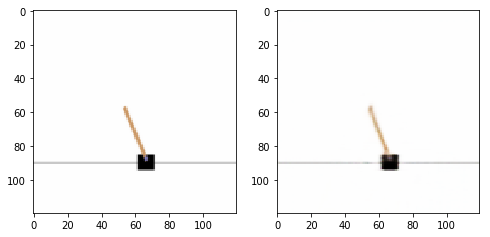

In [227]:
rec3 = cart_vae.decode_latent(z3)[0]
f, axarr = plt.subplots(1,2,figsize=(8,8))
axarr[0].imshow(img3)
axarr[1].imshow(rec3)
plt.show()

Looks good to me!